In [5]:
# Imports
import os
import fitz  
import base64
from IPython.display import display, HTML
# from PIL import Image as PILImage
# from io import BytesIO

In [8]:
def print_figure(files_names, widths):
    pdf_files = files_names
    # Convert first page of each PDF to an image and base64-encode it
    image_tags = []
    i = 0
    for pdf_file in pdf_files:
        doc = fitz.open(pdf_file)
        page = doc.load_page(0)  # first page
        pix = page.get_pixmap(dpi=100)
        img_bytes = pix.tobytes("png")
        img_b64 = base64.b64encode(img_bytes).decode("utf-8")
        
        # Create image tag with filename as tooltip
        tag = f'<img src="data:image/png;base64,{img_b64}" width='+str(widths[i])+' style="margin:5px; display:inline-block;" title="{pdf_file}" />'
        image_tags.append(tag)
        doc.close()
        i += 1

    # Display images side by side
    html_code = "".join(image_tags)
    display(HTML(html_code))

### Model 4

\begin{equation}
    \left\lbrace \begin{array}{lllll}
    &\displaystyle\max_{u(\cdot)\in [0, u_{\max}]} \ \ J(u):=\int_0^T P\big(x(t),u(t)\big) \; d t  
    \\
    \\
    \text{s.t.}&\\
    &\dot{x}(t) = \big(M(s(t))-u(t)I_n+\varepsilon Z\big)x(t), \\
    \\
       & \dot{s}(t) = - \displaystyle\sum_{j=1}^n\frac{ \mu_j(s(t))x_j(t)}{Y_j}+ u(t)(s_{in}-s(t)),\\
    \\
      &S(x(T))  \leq \alpha,
    \end{array}
    \right.
\end{equation}

Monod kinetics of the type 

$
\mu_i (s) = \displaystyle\frac{i\ s}{i^2+s}
$

Data for the simulations: 

| $n$ | $u$   | $s_{in}$ | $Y_i$ | $x_i(0)$ | $s(0)$ |
| --| --- | ---- | --- | ------ | ---- |
| 5 | 1.5 | 35   | 1   | 5      | 10   |



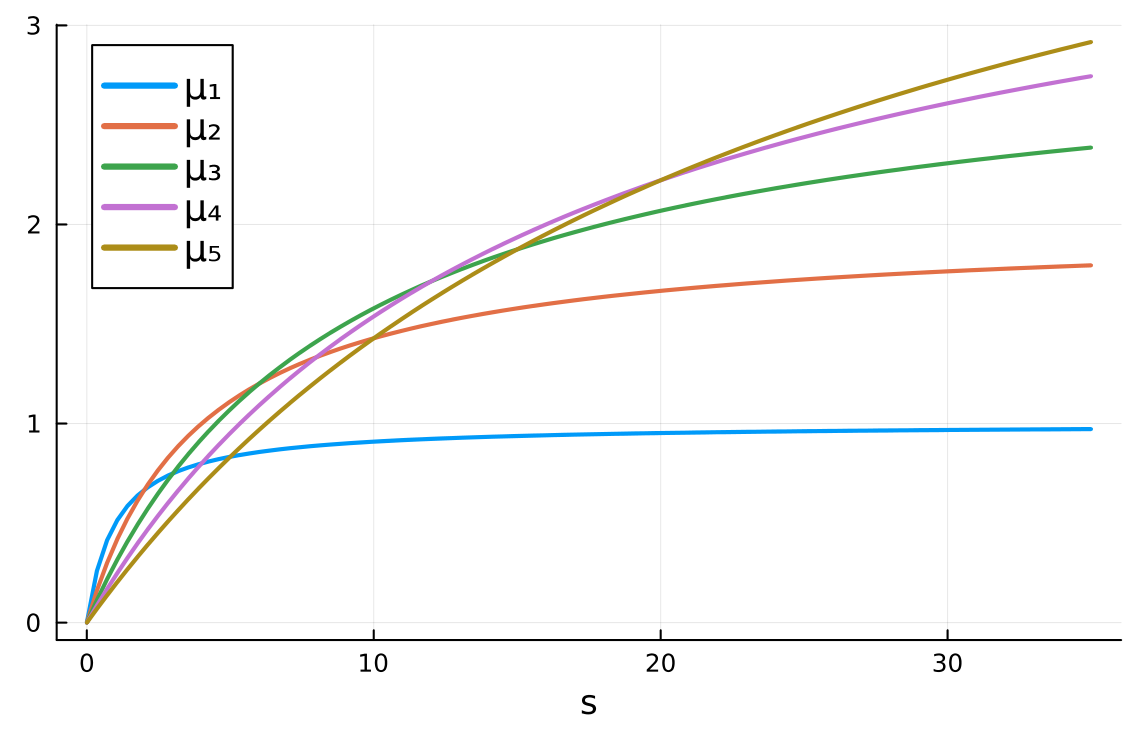

In [15]:
w = 500
file_name = "output/kinetics_n=5.pdf"
print_figure(file_name, w)

Trajectory simulation for $\varepsilon=0.01$ and $\varepsilon=0.02$


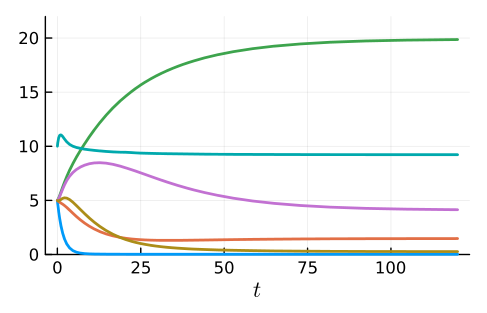
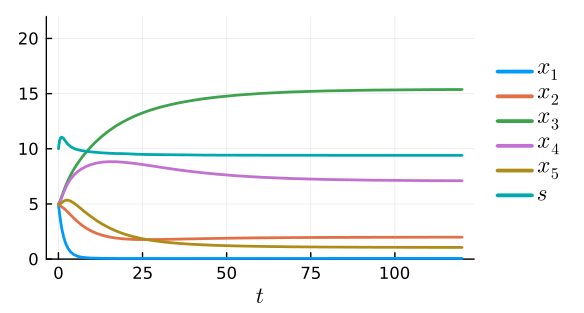

In [11]:
figures_names = ["output/sim_e001o001.pdf", "output/sim_e002o002.pdf"]
print_figure(figures_names, [400,480])